In [1]:
import sys
from collections import namedtuple

import numpy as np

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

import lmfit

from joblib import Parallel, delayed  
import multiprocessing

np.random.seed(666)

import pandas as pd
class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

In [17]:
import cPickle as pickle
import gzip
(results, results2, results3) = pickle.load( gzip.GzipFile( "results.p.gz", "rb" ) )

### Investigate the poor performance of ip_diffim dipole fitter on small separations...

(-10000, 10000)

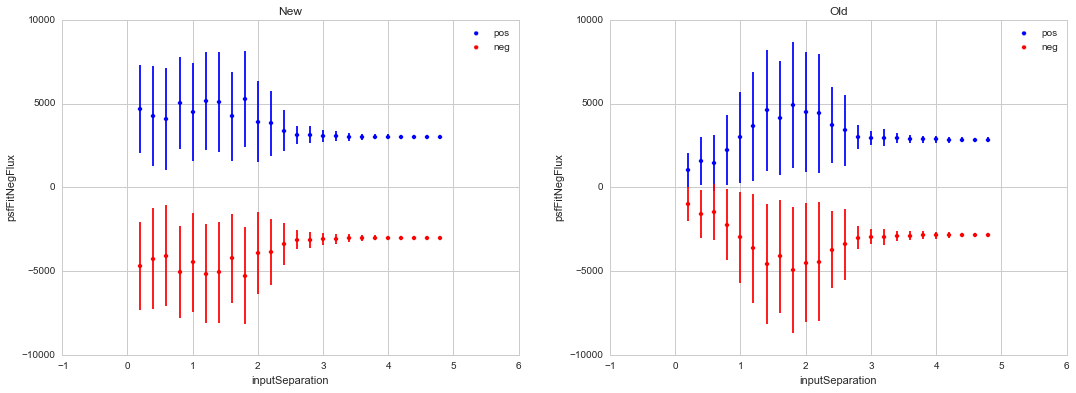

In [18]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df = pd.DataFrame([res['new'] for res in results])
tmp_df = df.groupby('inputSeparation').mean()
tmp_df['inputSeparation'] = tmp_df.index.values
tmp_df2 = df.groupby('inputSeparation').std() * 1.
ax = tmp_df.plot(x='inputSeparation', y='psfFitPosFlux', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[0])
tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)

df = pd.DataFrame([res['old'] for res in results])
tmp_df = df.groupby('inputSeparation').mean()
tmp_df['inputSeparation'] = tmp_df.index.values
tmp_df2 = df.groupby('inputSeparation').std() * 1.
ax = tmp_df.plot(x='inputSeparation', y='psfFitPosFlux', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[1])
tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)

axes[0].set_title('New')
axes[0].set_ylim([-10000,10000])
axes[1].set_title('Old')
axes[1].set_ylim([-10000,10000])

(-2000, 15000)

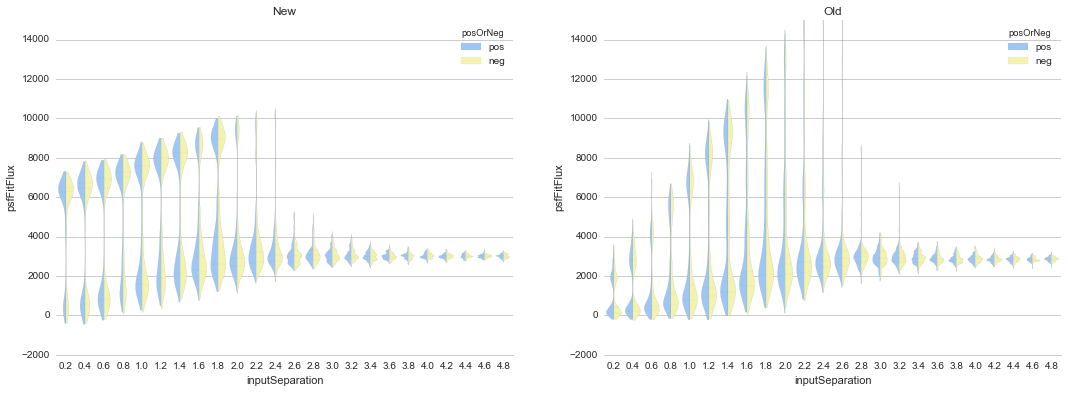

In [21]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df1 = pd.DataFrame([res['new'] for res in results])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.2, ax=axes[0])
sns.despine(left=True)

df1 = pd.DataFrame([res['old'] for res in results])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df1.loc[(df1.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
df2.loc[(df2.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.2, ax=axes[1])
sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-2000,15000])
axes[1].set_title('Old')
axes[1].set_ylim([-2000,15000])

In [24]:
df2 = pd.DataFrame([res['new'] for res in results])
sizeme(df2.loc[df2.inputSeparation==0.4].head())

,inputCentroidX,inputCentroidY,inputFlux,inputNegCentroidX,inputNegCentroidY,inputPosCentroidX,inputPosCentroidY,inputRotation,inputSeparation,psfFitCentroidX,psfFitCentroidY,psfFitNegCentroidX,psfFitNegCentroidY,psfFitNegFlux,psfFitOrientation,psfFitPosCentroidX,psfFitPosCentroidY,psfFitPosFlux,psfFitSignaltoNoise
1,25,25,3000,24.8,25,25.2,25,0,0.4,25.341706,25.192644,25.243755,25.214218,-6549.447353,-12.421193,25.439658,25.171070,6571.751038,0.040079
25,25,25,3000,24.8,25,25.2,25,0,0.4,25.345569,24.904249,25.270745,24.912306,-6464.167727,-6.145849,25.420393,24.896192,6492.428699,0.016205
49,25,25,3000,24.8,25,25.2,25,0,0.4,25.086249,25.866926,23.345073,26.838686,-274.703877,-29.166108,26.827426,24.895167,473.305646,18.273175
73,25,25,3000,24.8,25,25.2,25,0,0.4,24.688767,25.139975,24.597691,25.126813,-6424.046470,8.222939,24.779842,25.153136,6499.930437,0.029150
97,25,25,3000,24.8,25,25.2,25,0,0.4,25.213058,25.048663,24.179090,25.233643,-805.841275,-10.143054,26.247026,24.863684,820.142819,5.490792


### Let's take a look at one of the fits with an erroneously big fit flux...

First need to load up the fitting functions...